In [1]:
from specialist_data import pipeline
from cl_models import Specialist

batch_sizes = [1, 2, 4, 8, 10, 20, 40, 50]

In [2]:
from models.specialist.evolution.static import StaticEvolution

for batch_size in batch_sizes:
    manager = pipeline()
    # Run specialist in all seeds
    for seed, transformed in manager.transformed.items():
        specialist = Specialist(start_generation=1000)
        evolution = StaticEvolution(transformed, seed, specialist, batch_size)
        evolution.evolve_process(start=specialist.start_generation)

In [3]:
from models.specialist.stats.static_evolution_stats import StaticEvolutionStats

manager = pipeline()
seeds = [seed for seed in manager.transformed.keys()]

stats = StaticEvolutionStats(seeds=seeds, batch_sizes=batch_sizes, specialist_type='mlp_classifier')
stats.get_data()

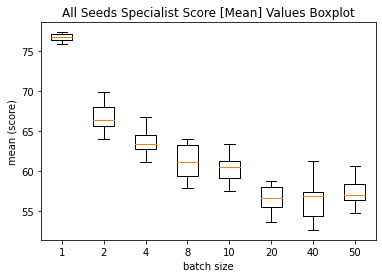

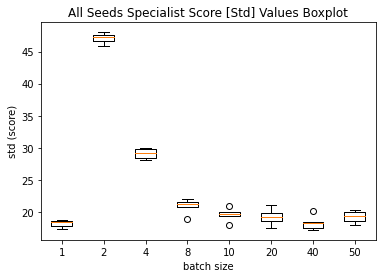

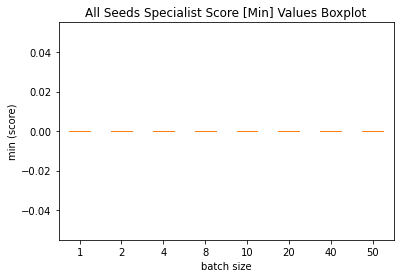

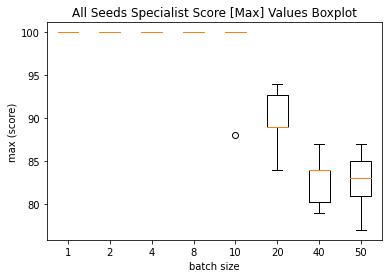

In [4]:
stats.compare_batches_metric('mean')
stats.compare_batches_metric('std')
stats.compare_batches_metric('min')
stats.compare_batches_metric('max')

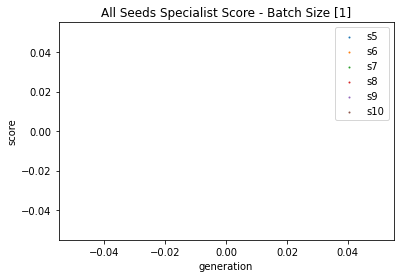

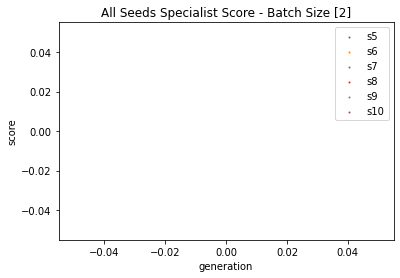

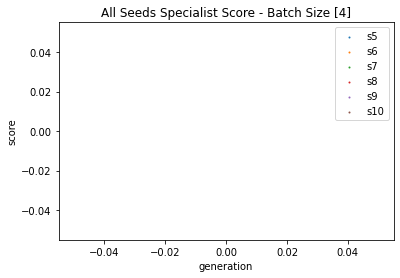

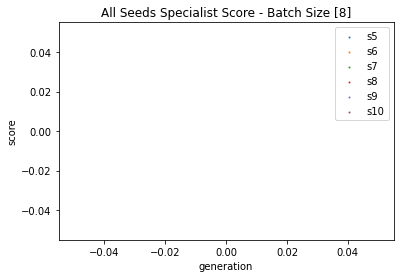

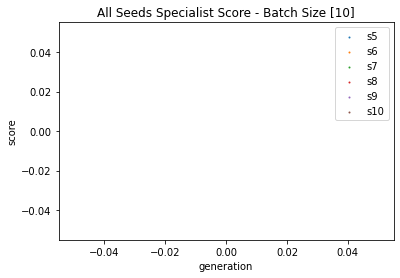

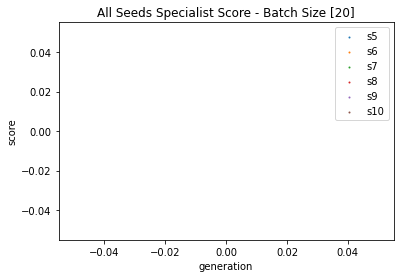

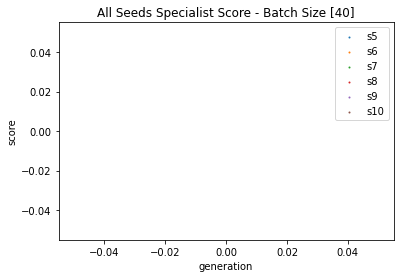

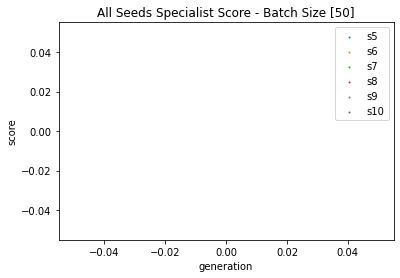

In [5]:
for batch in stats.batch_sizes:
    stats.plot_seeds_scatter(batch)